#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
# load dataset
diabetes = pd.read_csv(r"C:\Users\Administrator\Desktop\Datasets\diabetes.csv")

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Descriptive statistics
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes.shape

(768, 9)

In [5]:
# Check relationship between variable
diabetes_corr = diabetes.corr()

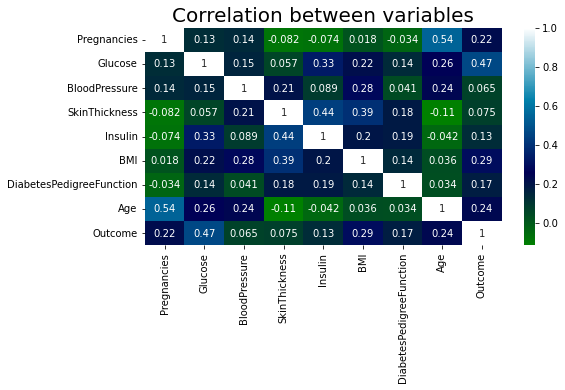

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(diabetes_corr, annot=True, cmap='ocean')
plt.title('Correlation between variables', fontsize=20)
plt.show()

In [10]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Age and BloodPressure Trends

In [35]:
age_BP = diabetes[['Age','BloodPressure']]
age_BP.head()

,Age,BloodPressure
0,50,72
1,31,66
2,32,64
3,21,66
4,33,40


<Figure size 1440x720 with 0 Axes>

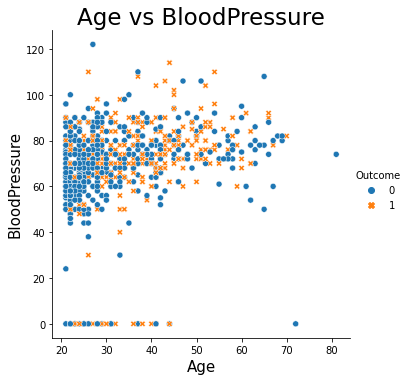

In [44]:
plt.figure(figsize=(20,10))
sns.relplot(data=age_BP, x='Age', y='BloodPressure',hue=diabetes['Outcome'],style=diabetes['Outcome'])
plt.xlabel('Age',fontsize=15)
plt.ylabel('BloodPressure',fontsize=15)
plt.title("Age vs BloodPressure", fontsize=23)
plt.show()

### Split the dataset into feature and target size

In [56]:
# X - feature
# Y- Target

x = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y= diabetes[['Outcome']]

In [58]:
print(x.shape)
print(y.shape)

(768, 8)
(768, 1)


In [59]:
# split the dataset into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)


In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537, 1)
(231, 8)
(231, 1)


In [62]:
# Standardize the train dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [63]:
logisticR = LogisticRegression()

In [64]:
# train the model
logisticR.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [68]:
# predict the target
y_pred = logisticR.predict(x_test)

In [67]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [72]:
# Check the accuracy of the model
score = logisticR.score(x_test,y_test)

In [73]:
score

0.7445887445887446

In [110]:
y_test[:5]

,Outcome
668,0
324,0
624,0
690,0
473,0


In [111]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [82]:
from sklearn import metrics

In [83]:
cm = metrics.confusion_matrix(y_pred, y_test)

In [84]:
cm

array([[124,  32],
       [ 27,  48]], dtype=int64)

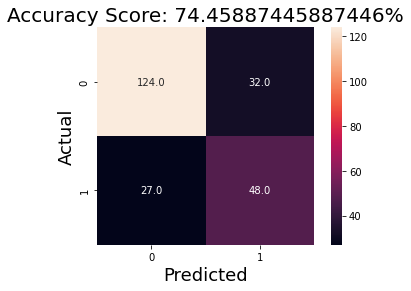

In [96]:
sns.heatmap(cm, annot=True, square=True, fmt='.1f')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
title = 'Accuracy Score: {0}%'.format(score*100)
plt.title(title, size=20)
plt.show()